In [1]:
import numpy as np
import matplotlib.pyplot as plt
import csv
from scipy.optimize import curve_fit

Finding out what is the total population number M, and the total number of infected people per day:

M = 210147125
t = [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70]
i = [1.00000e+00 1.00000e+00 1.00000e+00 2.00000e+00 2.00000e+00 2.00000e+00
 2.00000e+00 3.00000e+00 8.00000e+00 1.30000e+01 1.90000e+01 2.40000e+01
 2.90000e+01 3.40000e+01 5.40000e+01 9.00000e+01 1.09000e+02 1.45000e+02
 2.26000e+02 2.96000e+02 3.50000e+02 5.29000e+02 6.49000e+02 9.86000e+02
 1.20400e+03 1.61200e+03 1.96000e+03 2.25500e+03 2.54900e+03 2.98900e+03
 3.47600e+03 3.93100e+03 4.32000e+03 4.66200e+03 5.83200e+03 6.92700e+03
 8.08600e+03 9.21200e+03 1.03820e+04 1.12940e+04 1.22400e+04 1.41420e+04
 1.62420e+04 1.82560e+04 1.99450e+04 2.09920e+04 2.24560e+04 2.38670e+04
 2.57810e+04 2.90460e+04 3.10230e+04 3.43420e+04 3.71930e+04 3.90640e+04
 4.09120e+04 4.36310e+04 4.64110e+04 5.02830e+04 5.43230e+04 5.95510e+04
 6.33350e+04 6.74710e+04 7.3767

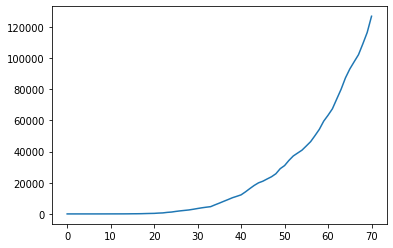

In [2]:
with open("../COVID-19_Brazil/DATA/COVID-19_Brazil_CONFIRMED.csv",'r') as csvfile:
    reader = csv.reader(csvfile, delimiter=',')
    M = 0
    t = np.arange(71)
    linecounter = 0
    i = np.zeros(71)
    for row in reader:
        if linecounter > 0:
            M += int(row[3])
        columncounter = 0
        while columncounter < len(row):
            if linecounter > 0:
                if columncounter >= 6 and columncounter <= len(row)-1:
                    if row[columncounter] == "NA":
                        row[columncounter] = row[columncounter-1]
                    i[columncounter - 6] += int(row[columncounter])
            columncounter +=1
            
        
        linecounter += 1
    
    
        
    print("M =", M)
    print("t =", t)
    print("i =", i)
    plt.plot(t, i)

In [3]:
def logistic (t, alpha, gamma):
    return (M*alpha)/(1+(M*alpha-1)*np.exp(-alpha*gamma*t))

alfa =  0.0005601920569800107 , gamma =  361.58219535596334


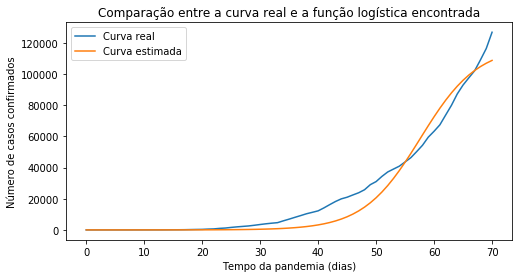

In [10]:
# Realizando o fit da funcao logistica, com alfa entre 0 e 1 e gamma entre 0 e 1000. Os valores das 
#  tentativas iniciais sao alfa = 0.5 e gamma = 50
popt = curve_fit(logistic, t, i, [0.5,50], bounds = (0, [1., 1000]))

print("alfa = ", popt[0][0], ", gamma = ", popt[0][1])

alpha = popt[0][0]
gamma = popt[0][1]

# Calculando os pontos da funcao logistica estimada
i2 = logistic(t, alpha, gamma)


# Tracando o grafico para comparar os dois
plt.figure(1, figsize=(8,4))
plt.title("Comparação entre a curva real e a função logística encontrada")
plt.xlabel('Tempo da pandemia (dias)')
plt.ylabel('Número de casos confirmados')
plt.plot(t,i,i2)
plt.legend(("Curva real", "Curva estimada"))
plt.savefig('SI.png')

(array([2.51501512e-04, 1.00000000e+03]), array([[ 1.87533706e-08, -7.64571877e-02],
       [-7.64571877e-02,  3.11738016e+05]]))
(array([2.5735693e-04, 8.9359391e+02]), array([[ 6.14600140e-11, -2.49458679e-04],
       [-2.49458679e-04,  1.03579149e+03]]))


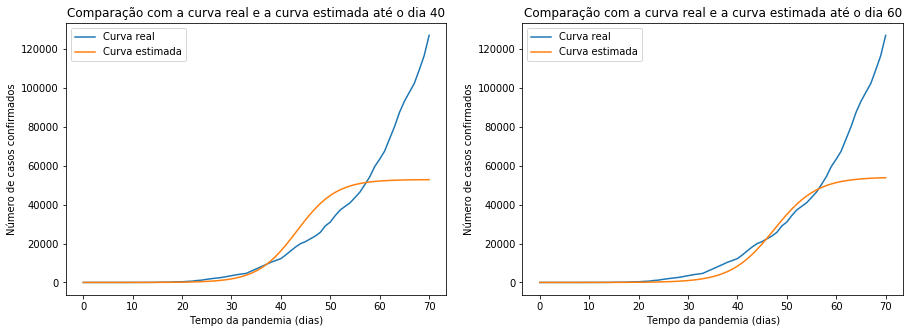

In [9]:
plt.figure(1, figsize=(15,5))
k =1

for j in [40, 60]:
    popt = curve_fit(logistic, t[0:j], i[0:j], [0.5,500], bounds = (0, [1., 1000]))

    print(popt)

    alpha = popt[0][0]
    gamma = popt[0][1]

    i2 = logistic(t, alpha, gamma)
    plt.subplot(1,2,k)
    plt.title('Comparação com a curva real e a curva estimada até o dia '+ str(j))
    plt.plot(t, i, i2)
    plt.xlabel('Tempo da pandemia (dias)')
    plt.ylabel('Número de casos confirmados')
    plt.legend(("Curva real", "Curva estimada"))
    k += 1
plt.savefig('SIcomp.png')